In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d
import seaborn as sns
import os
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import datetime 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from ClassFunctions import precip_time_series, rainfall_analysis
from PlottingFunctions import *

## Create object containing rainfall events for one gauge

In [46]:
all_events = []
negatives=[]
dest_dir = "/nfs/a319/gy17m2a/MetricEvaluation/DanishRainData/"
files = [ f for f in os.listdir(dest_dir) if os.path.isfile(os.path.join(dest_dir,f)) ][0:1]
for file in ["598120_precip_minute.csv"]:
    print(file)
    if pd.read_csv(f"/nfs/a319/gy17m2a/MetricEvaluation/DanishRainData/{file}").empty:
        print("The CSV file has no data rows.")
    else:   
        ts = precip_time_series(f"/nfs/a319/gy17m2a/MetricEvaluation/DanishRainData/{file}")
        if len(ts.data[ts.data['precipitation (mm/hr)']<0]) >0:
            print("Not including, still has negatives")
            negatives.append(file)
        else:
            ts.pad_and_resample('5min')

            # check if enough values
            dt_index = ts.data.index
            full_range = pd.date_range(start=dt_index.min(), end=dt_index.max(), freq='5T')
            missing = full_range.difference(dt_index)
            print(f"Number of missing time steps: {len(missing)}")
            if len(missing) > 0:
                print("First few missing timestamps:")
                print(missing[:10])

            analysis = rainfall_analysis('11h', ts)

            if ts.events != None:
                analysis.get_metrics()
                df = pd.DataFrame(analysis.metrics)
                df['gauge_num'] = file[:6]
                all_events.append(df)
                with open(f'/nfs/a319/gy17m2a/MetricEvaluation/DanishRainDataPickles/{file}.pkl', 'wb') as f:
                    pickle.dump(ts, f, pickle.HIGHEST_PROTOCOL)

                all_events_df = pd.concat(all_events)
                all_events_df.to_csv("All_events_new.csv", index=False)

598120_precip_minute.csv
Making the class
duplicate flags length: 0
Number of missing time steps: 0

_DMC_10
_dblnorm


In [3]:
print(len(all_events_df))
all_events_df = all_events_df[all_events_df['total_precip']>4]
print(len(all_events_df))

147
88


In [43]:
if ts.events != None:
    analysis.get_metrics()
    df = pd.DataFrame(analysis.metrics)
    df['gauge_num'] = file[:6]
    all_events.append(df)
    print(len(all_events))
    with open(f'/nfs/a319/gy17m2a/MetricEvaluation/DanishRainDataPickles/{file}.pkl', 'wb') as f:
        pickle.dump(ts, f, pickle.HIGHEST_PROTOCOL)

    all_events_df = pd.concat(all_events)
    all_events_df.to_csv("All_events_new.csv", index=False)

In [31]:
def pad_and_resample(ts, freq = f'{temp_res}min' ,pad_value = 0):
    # Resample the data to the specified frequency and pad missing values with pad_value
    ts.data = ts.data.resample(freq).sum().fillna(pad_value)
    ts.data *= 60 / temp_res
    ts.padded = True
    return ts

In [65]:
event = ts.raw_events[2]
find_heaviest_run_half(event.iloc[:, 0].to_numpy(), '')

('second_half', 135, 170)

In [33]:
ts = precip_time_series(f"/nfs/a319/gy17m2a/MetricEvaluation/DanishRainData/{file}")
pad_and_resample(ts, '5min')
ts.data[:20]
# ts.data are values in mm/min they are 0.05, 0, 0, 0, 0.10. I want to 

Making the class
duplicate flags length: 0


,precipitation (mm/hr)
2023-03-07 01:05:00,0.60
2023-03-07 01:10:00,0.72
2023-03-07 01:15:00,0.84
2023-03-07 01:20:00,1.08
2023-03-07 01:25:00,0.72
2023-03-07 01:30:00,0.96
2023-03-07 01:35:00,0.96
2023-03-07 01:40:00,0.24
2023-03-07 01:45:00,1.08
2023-03-07 01:50:00,0.72


In [5]:
# print(len(all_events_df))
# all_events_df = all_events_df[all_events_df['total_precip']>4]
# print(len(all_events_df))

In [6]:
# del all_events_df['min_intensity']
# del all_events_df['BSC']
# del all_events_df['BSC_Index']

In [7]:
# all_events_df.to_csv("three_gauge_events.csv", index=False)
# all_events_df = pd.read_csv("three_gauge_events.csv")
# all_events_df.copy=all_events_df.copy()

In [8]:
# del all_events_df['BSC']
# del all_events_df['BSC_DMC']
# del all_events_df['mean_intensity_DMC']
# del all_events_df['min_intensity_DMC']
# all_events_df.rename(columns={"third_class_max_percent_DMCs": "third_class_max_percent_DMC"}, inplace=True)

## Create Correlation matrix

In [9]:
# comparison_df = compare_metrics_from_df(all_events_df)

In [10]:
filtered_events_df = all_events_df[all_events_df['duration'] % 20 == 0]
comparison_df = compare_metrics_from_df(filtered_events_df)

TypeError: compare_metrics_from_df() missing 2 required positional arguments: 'suffix1' and 'suffix2'

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 8))
# metric = comparison_df['metric'][2]

# x = all_events_df[metric]
# y = all_events_df[f'{metric}_DMC']

# # Remove NaNs
# mask = ~x.isna() & ~y.isna()
# x = x[mask]
# y = y[mask]

# # Density plot
# sns.histplot(x=x, y=y, bins=5, pmax=0.9, ax=ax, cmap="viridis", cbar=False)

# ax.set_title(metric)
# ax.set_xlabel('Raw')
# ax.set_ylabel('DMC')

NameError: name 'comparison_df' is not defined

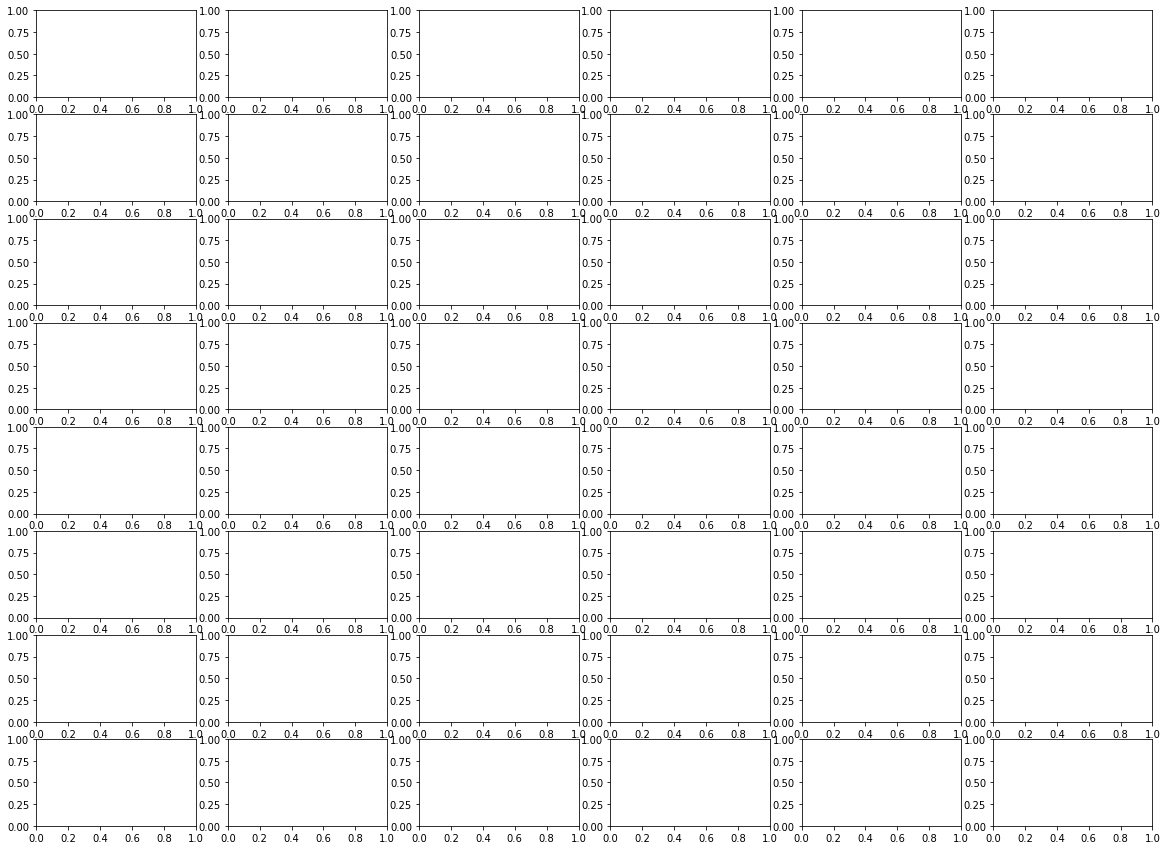

In [11]:
fig, axs = plt.subplots(nrows=8, ncols=6, figsize=(20, 15))

for ax_num, ax in enumerate(axs.flatten()):
    if ax_num < len(comparison_df['metric']):
        metric = comparison_df['metric'][ax_num]
        
        x = all_events_df[metric]
        y = all_events_df[f'{metric}_DMC']
        
        # Remove NaNs
        mask = ~x.isna() & ~y.isna()
        x = x[mask]
        y = y[mask]
        
        if metric == '4th_w_peak':
            bins=4
        elif metric == '5th_w_peak':
            bins=5   
        elif metric == 'ARR_Thirds' or metric =='3rd_w_peak' or metric == 'third_class_max_percent':
            bins=3
        elif metric == 'BSC_Index':
            bins=5
        else:
            bins=30
        
        # Density plot
        sns.histplot(x=x, y=y, bins=bins, pmax=0.9, ax=ax, cmap="plasma", cbar=False)
        
        ax.set_title(metric)
        ax.set_xlabel('Raw')
        ax.set_ylabel('DMC')
    else:
        ax.set_axis_off()

plt.tight_layout()
fig.savefig("DMC_Raw_Comparison.png", facecolor='white', edgecolor='white', dpi=300)

In [ ]:
raw_cols = []
for col in all_events_df.columns:
    if not col.endswith('_DMC'):
        raw_cols.append(col)
all_events_df_raw = all_events_df[raw_cols]

In [ ]:
correlation_matrix = all_events_df_raw.corr()

In [ ]:
# Create the plot
plt.figure(figsize=(20, 15))

# Mask the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Draw group separators (e.g., after every 3 variables)
group_sizes = [0, 9, 5]  # Adjust based on your actual groupings
group_cuts = np.cumsum(group_sizes)

for cut in group_cuts[:-1]:  # Don't draw line after the last group
    plt.axhline(cut, color='black', linewidth=1)
    plt.axvline(cut, color='black', linewidth=1)

# Create heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=False, fmt=".2f", 
            linewidths=0.5, cbar=True, xticklabels=True, yticklabels=True)

# Improve layout
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Ensure y-axis labels are readable
plt.tight_layout()

### Principal Components Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### PCA 2

In [12]:
correlation_matrix.to_csv("correlation.csv", index=False)

NameError: name 'correlation_matrix' is not defined

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'three_gauge_events.csv'
df = all_events_df
# Display the head of the dataframe to understand its structure

# Standardizing the data before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Performing PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()

In [ ]:
import matplotlib.pyplot as plt

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b', label='Explained Variance Ratio')
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', color='r', label='Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio and Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.axhline(y=0.80, color='g', linestyle='--', label='80% Threshold')
plt.axhline(y=0.90, color='orange', linestyle='--', label='90% Threshold')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Assuming we have the PCA components and the original feature names
# Let's extract the features contributing to the first 6 principal components

# Assuming pca.components_ contains the PCA components and original_feature_names is a list of feature names
# For demonstration, let's create a mock PCA components array and feature names
pca_components = pca.components_[:10]
original_feature_names = all_events_df.columns

# For now, let's create mock data for demonstration
np.random.seed(0)
# pca_components = np.random.rand(6, len(explained_variance))  # Mock PCA components for 6 components
# original_feature_names = [f'Feature {i+1}' for i in range(len(explained_variance))]  # Mock feature names

# Creating a DataFrame to show the contribution of each feature to the first 6 components
feature_contributions = pd.DataFrame(pca_components, columns=original_feature_names)
feature_contributions.index = [f'PC {i+1}' for i in range(10)]

In [ ]:
# Summarizing the most influential features for the first 6 principal components
# Finding the top contributing features for each principal component
num_top_features = 20  # Number of top features to display
summary = {}

for i in range(6):  # For each principal component
    top_features = feature_contributions.iloc[i].nlargest(num_top_features)
    summary[f'PC {i+1}'] = top_features.index.tolist()

summary_df = pd.DataFrame(summary)

# Displaying the summary of top features for each principal component
summary_df

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop any non-numeric or unwanted columns (e.g., identifiers)
X = all_events_df.select_dtypes(include=[float, int])

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=min(X.shape[1], 10))  # adjust number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame of PCA results
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df.index = all_events_df.index

# Variance explained
explained_var = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 4))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_var))], y=explained_var)
plt.title("Explained Variance by Principal Component")
plt.ylabel("Proportion of Variance")
plt.xlabel("Principal Component")
plt.show()

# Optional: biplot or loading plot
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=pca_df.columns)

# Plot first two PCs with loadings (biplot style)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"])
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings["PC1"][i]*2, loadings["PC2"][i]*2,
              color='r', alpha=1)
    plt.text(loadings["PC1"][i]*2.2, loadings["PC2"][i]*2.2, var, color='r')

plt.title("PCA Biplot (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.show()


### Hierarchical clustering

In [ ]:
clustered = cluster_from_correlation1(correlation_matrix, num_clusters=2)

In [ ]:
# Import necessary libraries for clustering and silhouette score calculation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare to calculate silhouette scores for different numbers of clusters
range_n_clusters = range(2, 11)  # Testing from 2 to 10 clusters
silhouette_scores = []

# Calculate silhouette scores for each number of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(correlation_matrix)
    silhouette_avg = silhouette_score(correlation_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

### Correlations with moments

In [ ]:
# Define your moment metrics of interest
moments = ['mean_intensity', 'std', 'kurtosis', 'skewness']
moments = [m for m in moments if m in all_events_df.columns]
print(moments)
corr_matrix, pval_matrix = corr_and_pvalues(all_events_df[5:10])

# Set up plot
fig, axs = plt.subplots(ncols=len(moments), figsize=(20,10))
vmin, vmax = -1, 1
heatmaps = []

for ax, moment in zip(axs, moments):
    # Correlations for one column
    col_corr = corr_matrix[[moment]].sort_values(by=moment, ascending=False)
    col_pval = pval_matrix[[moment]].loc[col_corr.index]

    # Annotate with asterisks for significance
    annotations = col_corr.copy()
    for i in range(len(annotations)):
        r = col_corr.iloc[i, 0]
        p = col_pval.iloc[i, 0]
        annotations.iloc[i, 0] = f"{r:.2f}" + ("*" if p < 0.05 else "")

    # Draw heatmap without colorbar
    hm = sns.heatmap(col_corr[1:], annot=annotations[1:], fmt="", cmap='coolwarm',
                     vmin=vmin, vmax=vmax, ax=ax, cbar=False, linewidths=0.5,
                     linecolor='lightgray', annot_kws={"size": 10})

    ax.set_title(f'Correlation with {moment}')
    heatmaps.append(hm)

# Add shared colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(heatmaps[-1].collections[0], cax=cbar_ax)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()
